In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# 12/22 
### 1. set overall flow of simulation
### 2. defined token value
### 3. assumed 10 year market size, discount rate, and velocity, gas fee, so on

## Todo (今日中、遅くとも今週末中):
### 1. define user/evaluator number determinants
### 2. set up update functions
### 3. try simulating

## Later: relaxing simplification
### 1. distinguish skill seller & skill buyer
### 2. incorporate dynamic & precise incentive structures
### 3. incorporate competitors barrier

# Overall Flow

In [ ]:
# controllable parameters 
reward_depreciation_exponent = 0.5
fee = 0.1 
token_supplycap = 10e6
floating = 0.25 
token_supply_distribution_rate = 1.3 #assume linear at first

In [ ]:
# initial assumptions (2749e8 in 2022 https://sharing-economy.jp/ja/20230124 2027&2032 prediction used) 
market_size_prediction = {2024:3000e8,
                         2025:4207e8,
                         2026:5414e8,
                         2027:6622e8,
                         2028:8193e8,
                         2029:9765e8,
                         2030:11337e8,
                         2031:12909e8,
                         2032:14481e8,
                         2033:16000e8}
user_acquiry_rate_cap = 0 #f(num_evaluator_t)...possible platform scale capped by number of evaluators
market_size_t = market_size_prediction[2024] #in Yen. initial
user_acquiry_rate = 0 #random distribution of f(incentive, competition, previous platform value, transaction cost). capped by user_acquiry_rate_cap. 
market_share_t = 0 #market_size*user_acquiry_rate
avg_token_hold_year = 2 #assume users will hold on to token for 2 year on average
token_velocity = 1/avg_token_hold_year
token_supply_t = 10e5
discount_rate = 0.2
terminal = 10
cumulative_gov_value = 0 #initial
gas_fee = 0.0005


In [ ]:
# state of value at time t
cost_t = 50e5
profit_t = market_share_t - cost_t
token_supply_t = min(token_supply_t*token_supply_distribution_rate, token_supplycap)
util_value_t = market_size_t * market_share_t / (token_supply_t*token_velocity*floating) #quantity theory of money approach
gov_value_t = profit_t/(1+discount_rate) #income approach
cumulative_gov_value_t = cumulative_gov_value_t + gov_value_t
total_gov_value_wterminal = profit/discount_rate/(1+discount_rate)**terminal


In [ ]:
# variables to mazimize
total_token_value = util_value_t + total_gov_value_wterminal

In [ ]:
# run simulation
util_token_value_results = [] #list of utility values
gov_token_value_results = [] #list of governance values
num_evaluator_list = []
num_user_list = []

for t in range(2024, 2034):
    market_size_t = market_size_prediction[t]
    ...
    update_platform()
    update_token_value()
    util_token_value_results.append()
    gov_token_value_results.append()
    num_evaluator_list.append()
    num_user_list.append()
    ...

In [ ]:
# visualize

In [ ]:
# do simulation for some parameter set
# find best from quantitative point of view
# check assumption sensitivity
# balance with qualitative objectives

# 12/23
# First Try: without details of user number (market share), evaluator number, cost function
## + definition of values updated

In [369]:
# sample state update function

########## Assumptions↓ ##########
# constant cost at 5 million yen per year
# synthetic market share data
# market size prediction according to external website https://sharing-economy.jp/ja/20230124
# using quantity theory of money for utility value of token
# income approach (discounted cash flow) for goverance value of token
# discount rate 20%
# token velocity 0.5
# floating factor = 0.25


def update_share():
    #update market share
    return #not implemented for now

def update_state(market_share_t, market_size_t, token_supply_prev=10e4, cumulative_gov_value_prev=0, t=1, discount_rate=0.2, cost_t=50e5, token_velocity=0.5, floating=0.25,token_supplycap=10e6,token_supply_distribution_rate=0.1, init_supply=10e4):
    #update utility value of token
    #update govenrnance value of token
    #update token supply
    add_token_supply = init_supply*token_supply_distribution_rate
    revenue_t = market_share_t*market_size_t
    profit_t = revenue_t - cost_t
    token_supply_t = min(token_supply_prev+add_token_supply, token_supplycap)
    util_value_t = market_size_t * market_share_t / (token_velocity*floating) / (1+discount_rate)**t # total token value, not per token
    gov_value_t = profit_t/(1+discount_rate)**t #income approach
    cumulative_gov_value_t = cumulative_gov_value_prev + gov_value_t
    return (token_supply_t, util_value_t, gov_value_t, cumulative_gov_value_t)


In [383]:
# set sample market share
share = [1e-6*2**i for i in range(0, 10)]
year = [i for i in range(2024, 2034)]
sample_market_share = {}
for i in range(10):
    sample_market_share[year[i]] = share[i]
sample_market_share

{2024: 1e-06,
 2025: 2e-06,
 2026: 4e-06,
 2027: 8e-06,
 2028: 1.6e-05,
 2029: 3.2e-05,
 2030: 6.4e-05,
 2031: 0.000128,
 2032: 0.000256,
 2033: 0.000512}

In [384]:
# set market prediction
market_size_prediction = {2024:3000e8,
                         2025:4207e8,
                         2026:5414e8,
                         2027:6622e8,
                         2028:8193e8,
                         2029:9765e8,
                         2030:11337e8,
                         2031:12909e8,
                         2032:14481e8,
                         2033:16000e8}

In [385]:
# sample simulation 1

#init
token_supply_t=10e4
cumulative_gov_value_t=0
i=1

# store result
util_value_list = []
gov_value_list = []
cumulative_gov_value_list = []
profit_list = []

# run simulation
for t in range(2024, 2034):
    market_share_t = sample_market_share[t]
    market_size_t = market_size_prediction[t]
    (token_supply_t, util_value_t, gov_value_t, cumulative_gov_value_t) = update_state(market_share_t, market_size_t, token_supply_t, cumulative_gov_value_t, i)
    util_value_list.append(util_value_t)
    gov_value_list.append(gov_value_t)
    cumulative_gov_value_list.append(cumulative_gov_value_t)
    i+=1
  
    

Text(0, 0.5, 'utility value billion¥')

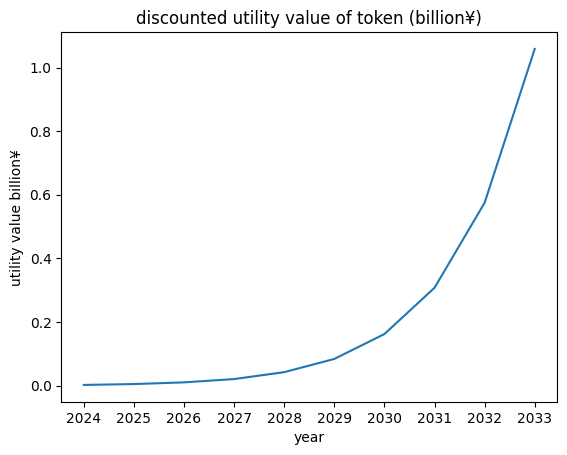

In [386]:
plt.plot(np.array(util_value_list)/1e9)
plt.title("discounted utility value of token (billion¥)")
plt.xticks([i for i in range(0,10)], year)
plt.xlabel("year")
plt.ylabel("utility value billion¥")


Text(0, 0.5, 'goverance value billion¥')

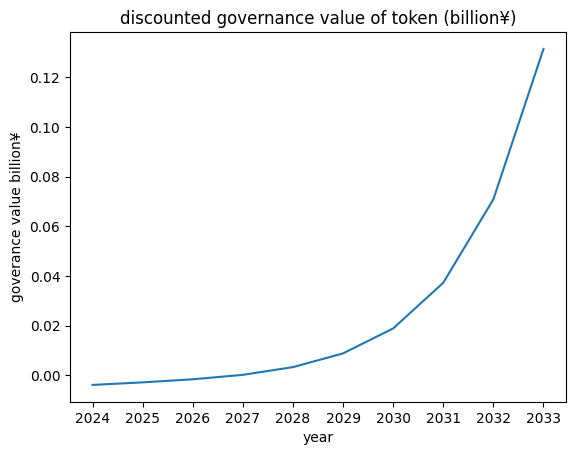

In [387]:
plt.plot(np.array(gov_value_list)/1e9)
plt.title("discounted governance value of token (billion¥)")
plt.xticks([i for i in range(0,10)], year)
plt.xlabel("year")
plt.ylabel("goverance value billion¥")

Text(0, 0.5, 'value billion¥')

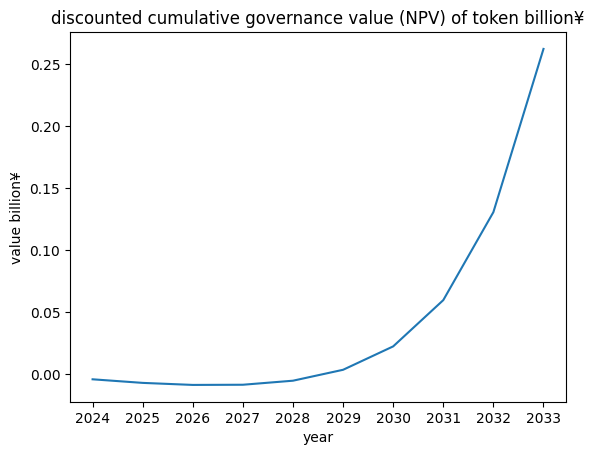

In [388]:
plt.plot(np.array(cumulative_gov_value_list)/1e9)
plt.title("discounted cumulative governance value (NPV) of token billion¥")
plt.xticks([i for i in range(0,10)], year)
plt.xlabel("year")
plt.ylabel("value billion¥")

In [389]:
print("Discounted utility value of token in 10 years:", util_value_t)
print("Discounted governance value of token in 10 years:", gov_value_t)
print("Total token value in 10 years:", util_value_t+gov_value_t)
print("Token supply in 10 years:", token_supply_t)
print("minimum initial fund needed (can be multi-stage):", -min(min(cumulative_gov_value_list), 0))


Discounted utility value of token in 10 years: 1058442988.0268934
Discounted governance value of token in 10 years: 131497845.58891244
Total token value in 10 years: 1189940833.6158059
Token supply in 10 years: 200000.0
minimum initial fund needed (can be multi-stage): 8444861.111111112


# 12/24
# Add user number (market share) simulation by utility theory with stickiness to existing platform

In [382]:
# how to simulate user number (market share):
## demand curve D is a function of comparative utility against competitor at time t and stickiness
## D(U_/Uc) where U_ is utility from our platform, Uc is utility from competitor's platform
### U_ = f(fee, gas, token_util), domain = [0, 1]
### Uc = f(fee, barrier_strategy), domain = [0, 1]
### D is defined in domain [0, market_size]
### D(U_/Uc<1) = 0

# stickiness 
## stickiness constant s represents how sticky the user is to existing platform.
## solve for D(U_/Uc = s) = market_size to get fitting parameter, given stickiness constant s
## also set D(U_/Uc > s) = market_size
### for example for linear D(U_/Uc) = k * U_/Uc, then D(U_/Uc = s) = k*s = market_size so k = market_size/s
### for example exponential D(U_/Uc) = (U_/Uc)^k then D(U_/Uc = s) = s^k = market_size so k = log_s(market_size)


In [ ]:
# define specific function of U_ ... utility from our platform


In [ ]:
# define specific function of Uc ... utility from competitor's platform


# Later: 
# Add evaluator number simulation by utility theory ... setting bound for market share = supply

In [ ]:
## supply is number of evaluators * evaluation per person, which is a function of reward and incentives to evaluators. 
## S(incentive_strength, eval_per_eval) = assume constant against utility of users